In [29]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure

In [30]:
image_pixels = io.imread("images/enverlop.jpg")
image_pixels.shape

(720, 1280, 4)

In [31]:
if image_pixels.shape[-1] == 4:
    image_pixels = image_pixels[..., :3]  # discard alpha

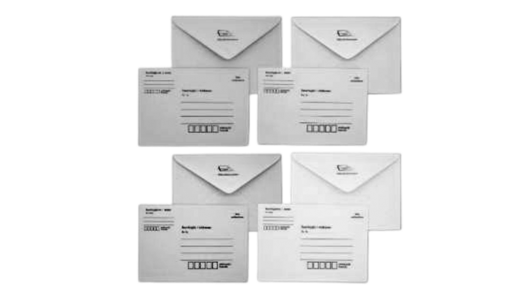

In [32]:
gray_img = color.rgb2gray(image_pixels)
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()

In [33]:
edge_sobel = filters.sobel(gray_img)
edge_sobel.shape

(720, 1280)

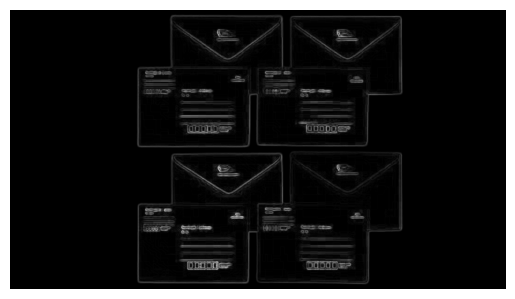

In [34]:
from skimage.util import img_as_ubyte

io.imsave("images/edge_sobel.png", img_as_ubyte(edge_sobel))

plt.imshow(edge_sobel, cmap="gray")
plt.axis("off")
plt.show()

In [35]:
threshold = 0.2
edges = edge_sobel > threshold
edges[30:33,:30]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]])

In [36]:
edge_pixel_indices = np.nonzero(edges)
edge_pixel_indices

(array([], dtype=int64), array([], dtype=int64))

In [37]:
edges[104,572]

np.False_

In [38]:
edge_points = np.column_stack(np.nonzero(edges))
edge_points[:3]

array([], shape=(0, 2), dtype=int64)

In [39]:
contours = measure.find_contours(edges, level=0.5)
contours

[]